# Content and Objective

+ Show how to get frequency response out of poles and zeros

# Importing and Plotting Options

In [1]:
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Show Example

### defining frequency regime

In [3]:
delta_Omega = .01
Omega = np.arange( 0, 2 * np.pi, delta_Omega )

### defining poles and zeros

In [4]:


# switch for choosing different pol-zero constellations
switch = 1

if switch == 1:
    # constant pre-factor of transfer function
    const = -2  
    
    zeros = np.array( [ -1, 1] )
    poles = np.array( [ .95j, -.95j ] )

elif switch == 2:
    # constant pre-factor of transfer function
    const = -2  
    
    zeros = np.array( [] )
    poles = np.array( [2] )
    
else:
    # constant pre-factor of transfer function    
    const = 0.5
    
    zeros = np.array( [ 0,0,0] ) 
    poles = np.array( [ .5, .25 + 1j * .8, .25 - 1j * .8] )

### plotting zeros and poles as well as unit circle

Text(0.5, 0, 'imag')

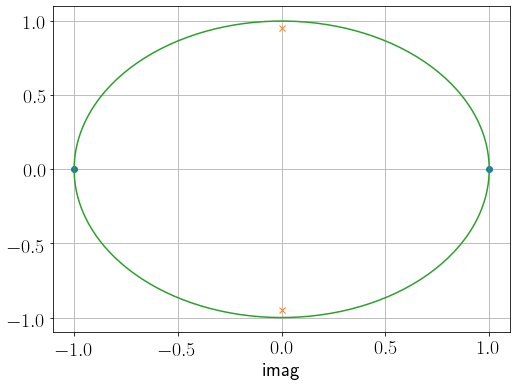

In [5]:
plt.subplot(121)

plt.plot( np.real( zeros ), np.imag( zeros ) , 'o')
plt.plot( np.real( poles ), np.imag( poles ) , 'x')

phi = np.linspace(0, 2*np.pi, 256)
unit_circle = np.exp( 1j * phi )

plt.plot( np.real( unit_circle ) , np.imag( unit_circle ) )

plt.grid( True )
plt.xlabel( 'real' )
plt.xlabel( 'imag' )

### get frequency response

In [6]:
# construct numerator and denominator by multiplying according distances
numerator = np.prod( [ ( np.exp( 1j * Omega ) - z ) for z in zeros ], axis=0 )
denominator = np.prod( [ ( np.exp( 1j * Omega ) - p ) for p in poles ], axis=0 )

# get frequency response
H = const * numerator / denominator

### plotting frequency response

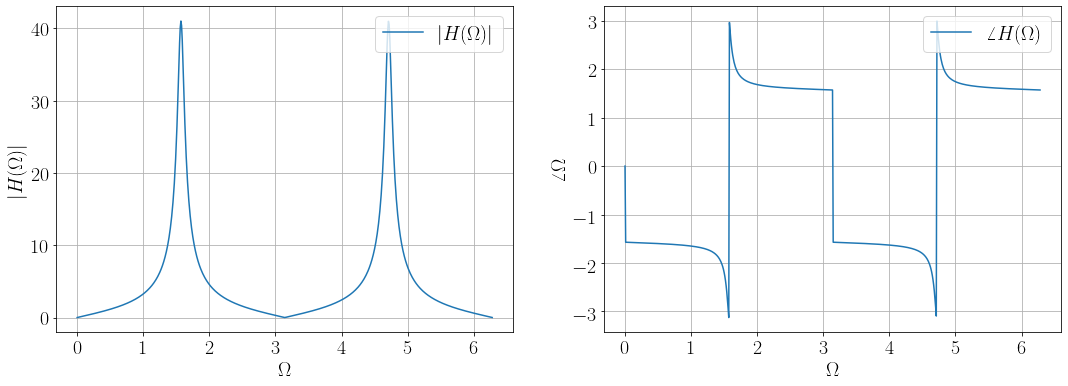

In [7]:
plt.subplot(121)
plt.plot( Omega, np.abs( H ), label='$|H(\\Omega)|$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.ylabel('$|H(\\Omega)|$')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot( Omega, np.angle( H ), label='$\\angle H(\\Omega)$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.ylabel('$\\angle \\Omega$')
plt.legend(loc='upper right')

### get impulse response

In [8]:
t, h = signal.dimpulse( ( zeros, poles, const, 1 ) )

__main__:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0, 0.5, '$h[n]$')

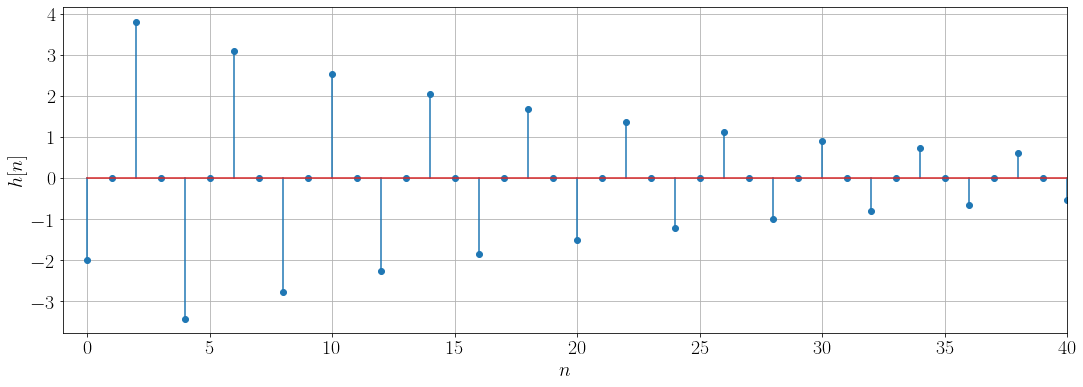

In [9]:
plt.stem( t, h[0] )

plt.xlim( (-1, 40) )
plt.grid( True )
plt.xlabel('$n$')
plt.ylabel('$h[n]$')

**Exercise:** Explain why the impulse response makes no sense when using switch=2.